In [39]:
import pickle

with open('result_K.txt', 'rb') as f:
    Kelly_results = pickle.load(f)
    Stab_results = pickle.load(f)
    
    
with open('result_S.txt', 'rb') as f:
    Sep_results = pickle.load(f)
    Mix_results = pickle.load(f)

In [40]:
problems = ['d05100','d10100','d10200','d20100','d20200','e05100','e10100','e10200','e20100','e20200']

In [41]:
re = pd.DataFrame(Kelly_results)
re = re.transpose()
name = ['method','iteration','M','S','total','M_per','sol']
re.columns = name

re1 = re
re1.drop(['M','S','sol'], axis=1, inplace=True)
re

,method,iteration,total,M_per
d05100,Kelly,861,6.60984,0.883877
d10100,Kelly,162,0.960903,0.713933
d10200,Kelly,774,42.2063,0.905551
d20100,Kelly,72,0.607625,0.577802
d20200,Kelly,233,8.72713,0.858623
e05100,Kelly,637,3.58163,0.873941
e10100,Kelly,196,1.20965,0.754381
e10200,Kelly,1160,63.7108,0.957677
e20100,Kelly,80,0.651202,0.582521
e20200,Kelly,267,10.3966,0.88241


In [42]:
re = pd.DataFrame(Sep_results)
re = re.transpose()
name = ['method','iteration','M','S','total','M_per','sol']
re.columns = name

re1 = re
re1.drop(['M','S','sol'], axis=1, inplace=True)
re

,method,iteration,total,M_per
d05100,Sep,695,7.30015,0.868941
d10100,Sep,159,1.96708,0.718623
d10200,Sep,775,62.6709,0.724057
d20100,Sep,75,1.15748,0.573048
d20200,Sep,231,12.4952,0.859553
e05100,Sep,659,5.99504,0.894962
e10100,Sep,197,1.94582,0.746736
e10200,Sep,1209,79.1558,0.958211
e20100,Sep,80,1.26131,0.583637
e20200,Sep,277,14.7762,0.881654


### Changes of objective function values during iterations

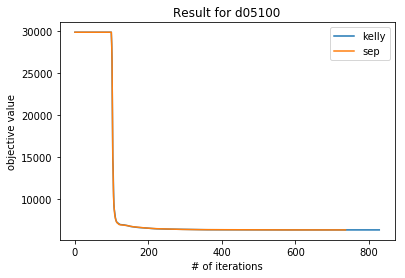

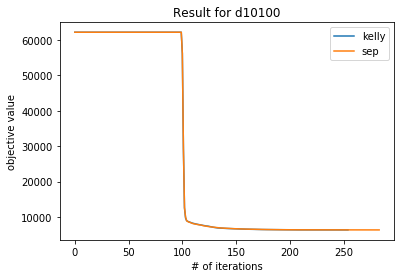

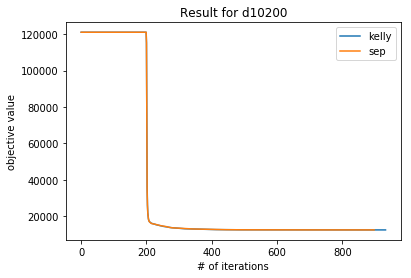

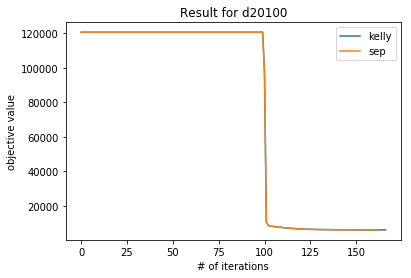

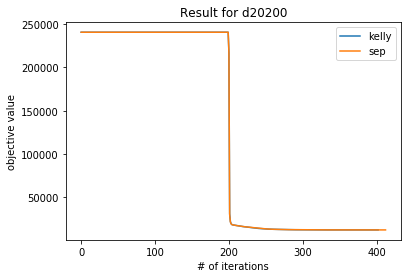

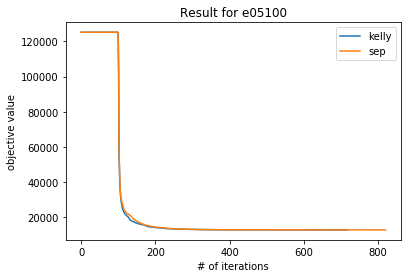

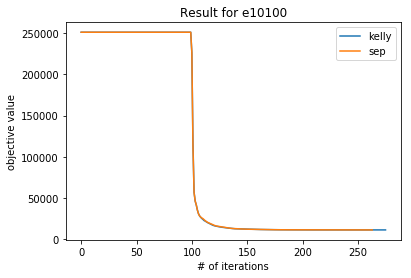

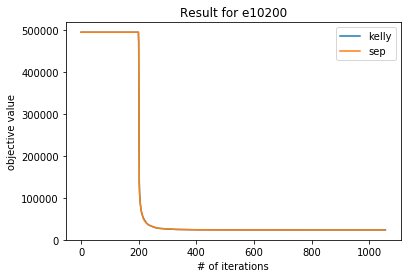

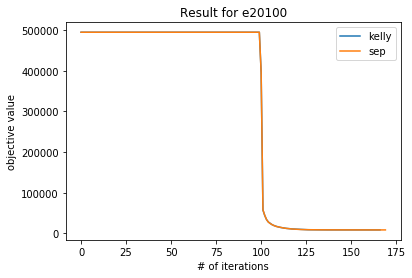

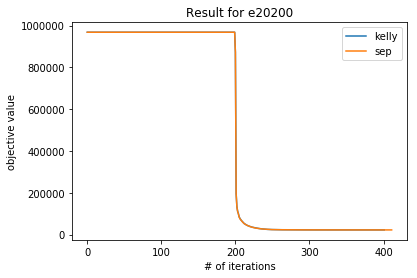

In [28]:
import matplotlib.pyplot as plt
import csv

for i in range(len(problems)):

    kelly = list(Kelly_results[problems[i]][6])
    sep = list(Sep_results[problems[i]][6])

    if len(kelly) > len(sep):
        extra = [None]*(len(kelly)-len(sep))
        sep.extend(extra)

    else: 
        extra = [None]*(len(sep)-len(kelly))
        kelly.extend(extra)


    x = range(len(sep))


    plt.plot(list(range(len(kelly))),kelly)
    plt.plot(list(range(len(kelly))),sep)


    plt.title('Result for %s'%(problems[i]))

    plt.xlabel('# of iterations')
    plt.ylabel('objective value')

    plt.legend(['kelly','sep'])
    plt.show()



### number of iterations

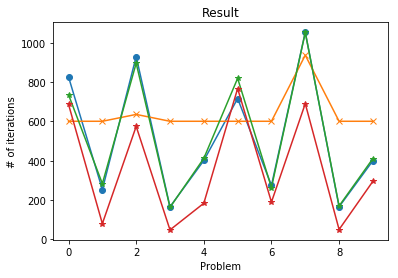

In [33]:
import matplotlib.pyplot as plt
import csv


# kelly = list(ori_1[list(ori_1.columns)[1]])
# stab = list(ori_2[list(ori_2.columns)[1]])
# sep = list(re_1[list(re_1.columns)[1]])
# sep_stab = list(re_2[list(re_2.columns)[1]])

kelly = []
stab = []
sep = []
sep_stab = []

for problem in problems :
    kelly.append(float(Kelly_results[problem][1]))
    stab.append(float(Stab_results[problem][1]))
    sep.append(float(Sep_results[problem][1]))
    sep_stab.append(float(Mix_results[problem][1]))
    
    
x = problems

plt.plot(list(range(len(kelly))),kelly, marker='o')
plt.plot(list(range(len(kelly))),stab, marker='x')
plt.plot(list(range(len(kelly))),sep, marker='*')
plt.plot(list(range(len(kelly))),sep_stab, marker='*')

plt.title('Result')

plt.xlabel('Problem')
plt.ylabel('# of iterations')

plt.legend()
plt.show()



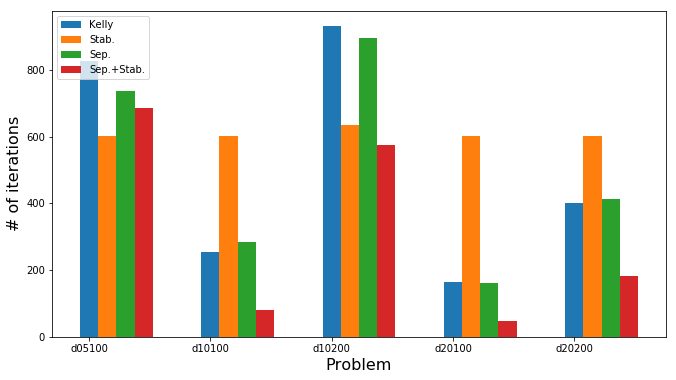

In [34]:
import matplotlib.pyplot as plt
types=['Kelly','Stab.','Sep.','Sep.+Stab.']
pos = np.arange(5)
bar_width = 0.15
plt.figure(figsize=(11, 6))
 
plt.bar(pos,kelly[:5],bar_width)
plt.bar(pos+bar_width,stab[:5],bar_width)
plt.bar(pos+bar_width+bar_width,sep[:5],bar_width)
plt.bar(pos+bar_width+bar_width+bar_width,sep_stab[:5],bar_width)

plt.xticks(pos, problems)
plt.xlabel('Problem', fontsize=16)
plt.ylabel('# of iterations', fontsize=16)
# plt.title('Comparison',fontsize=18)
plt.legend(types,loc=2)

plt.savefig('d.pdf')

plt.show()

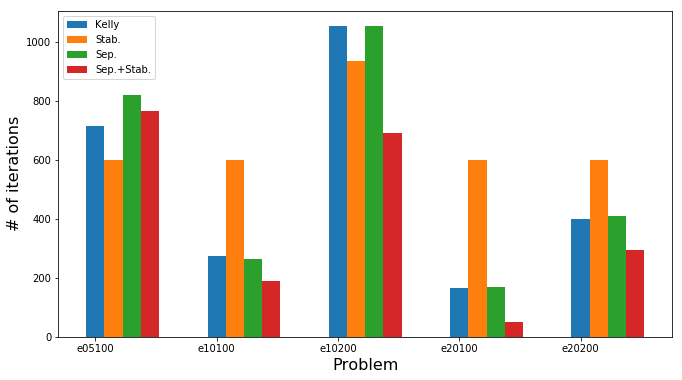

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 6))
 
plt.bar(pos,kelly[5:],bar_width)
plt.bar(pos+bar_width,stab[5:],bar_width)
plt.bar(pos+bar_width+bar_width,sep[5:],bar_width)
plt.bar(pos+bar_width+bar_width+bar_width,sep_stab[5:],bar_width)

plt.xticks(pos, problems[5:])
plt.xlabel('Problem', fontsize=16)
plt.ylabel('# of iterations', fontsize=16)
# plt.title('Comparison',fontsize=18)
plt.legend(types,loc=2)
plt.savefig('e.pdf')


plt.show()